## Importing Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [39]:
data = pd.read_csv('data_for_lr.csv')

In [40]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [42]:
data = data.dropna()
print(f"Dataset's shape = {data.shape}")

Dataset's shape = (699, 2)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### Splitting data

In [77]:
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)





# <font color = "green">Linear Regression</font>

## Forward Propogation

In [45]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Defining Cost Function

In [46]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    
    return cost

## Gradient Descent for Backpropagation

In [47]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (predictions - train_output)
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Parameters updating

In [48]:
def updateParameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## Data Training

In [49]:
def train(train_input, train_output, learning_rate, iters):
    
    
    parameters = dict()
    parameters['m'] = .1
    parameters['c'] = np.random.uniform(0, 1)
    
    plt.figure()
    loss = []
    
    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        
        print(f"Iteration = {i+1}, Loss = {cost}")
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+' , label = 'Original_result',c="blue")
        ax.plot(train_input, predictions, '*' , label = 'Training_result',c='black')

        derivatives = backward_propagation(train_input, train_output, predictions)
        
        parameters = updateParameters(parameters, derivatives, learning_rate)
        
    return parameters, loss
        

## Training

Iteration = 1, Loss = 1296.595663424469
Iteration = 2, Loss = 590.4405525037581
Iteration = 3, Loss = 270.05719462663376
Iteration = 4, Loss = 124.69890840217253
Iteration = 5, Loss = 58.74969105160241
Iteration = 6, Loss = 28.828456205969182
Iteration = 7, Loss = 15.253156928999038
Iteration = 8, Loss = 9.094026725058272
Iteration = 9, Loss = 6.299620644100393
Iteration = 10, Loss = 5.03179362474194
Iteration = 11, Loss = 4.456577216628009
Iteration = 12, Loss = 4.195599010094738
Iteration = 13, Loss = 4.077191023776741
Iteration = 14, Loss = 4.023467304382022
Iteration = 15, Loss = 3.999090908632299
Iteration = 16, Loss = 3.9880294262215576
Iteration = 17, Loss = 3.983008934835793
Iteration = 18, Loss = 3.980729247864247
Iteration = 19, Loss = 3.9796930669861847
Iteration = 20, Loss = 3.9792210662950156
Iteration = 21, Loss = 3.9790050348744677
Iteration = 22, Loss = 3.9789051370904365
Iteration = 23, Loss = 3.9788579293608324
Iteration = 24, Loss = 3.97883462726219
Iteration = 25, L

<Figure size 432x288 with 0 Axes>

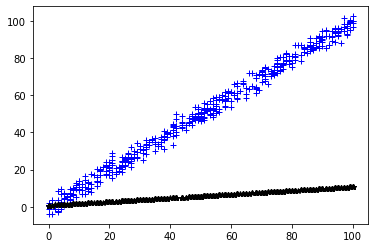

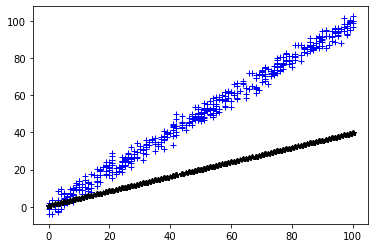

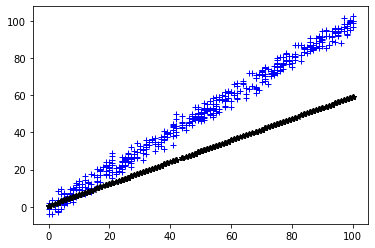

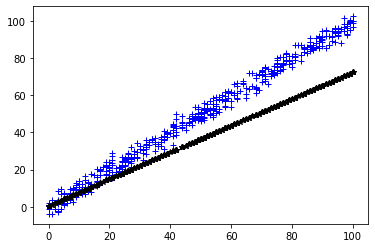

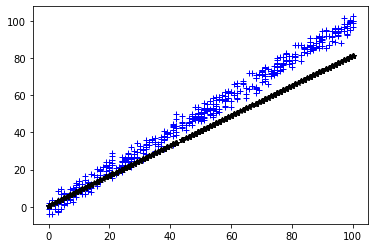

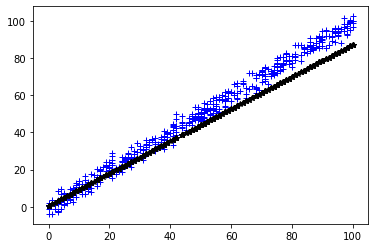

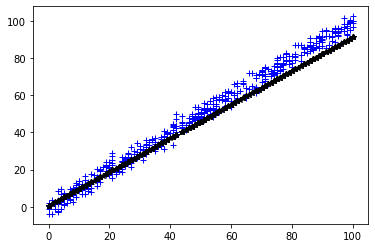

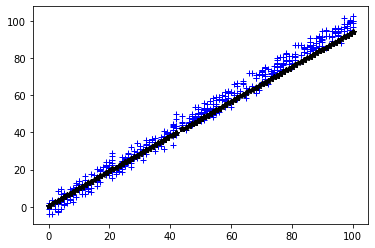

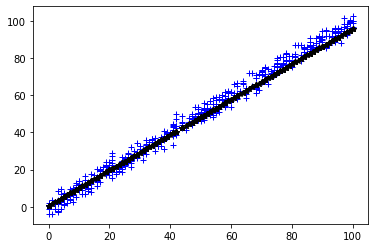

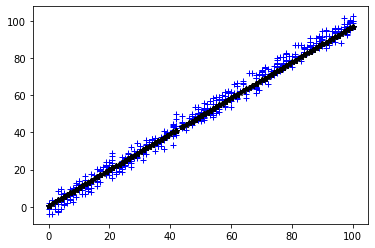

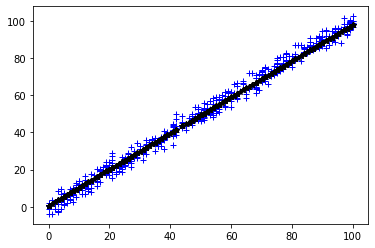

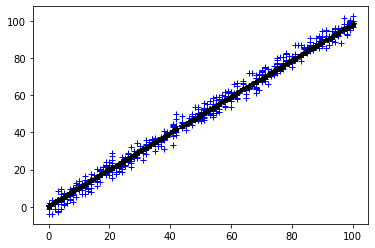

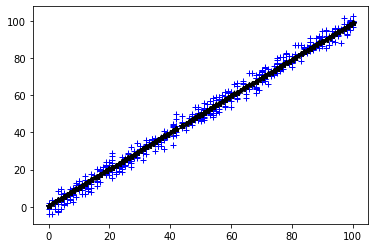

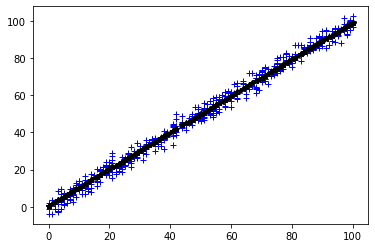

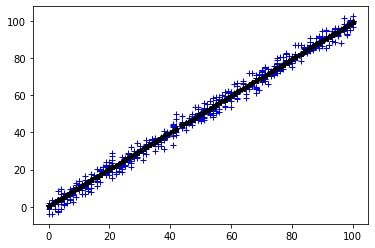

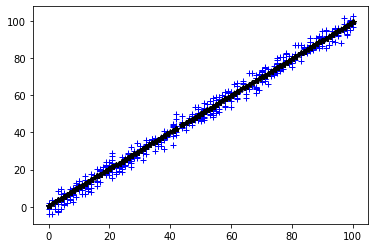

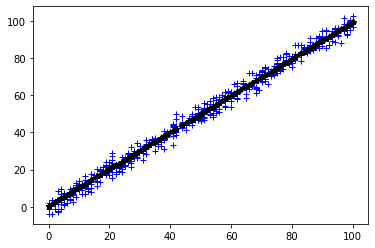

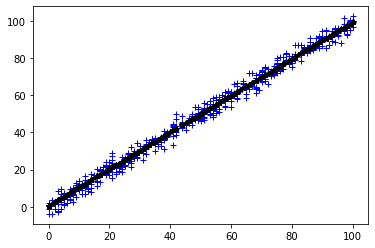

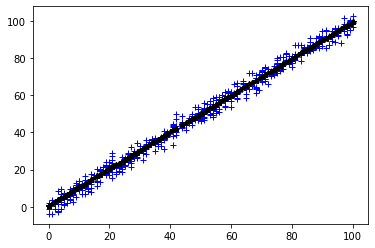

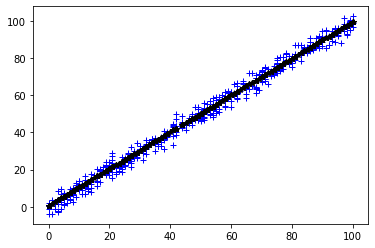

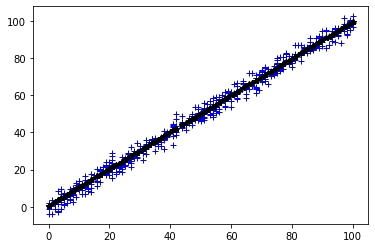

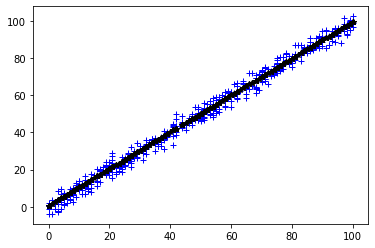

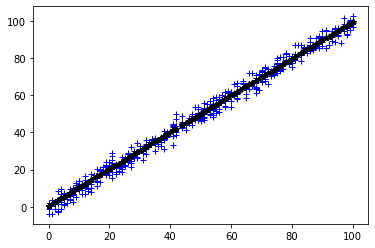

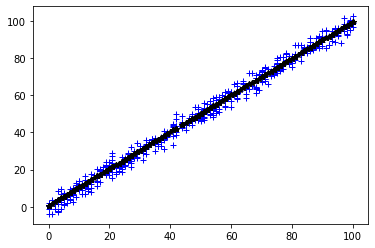

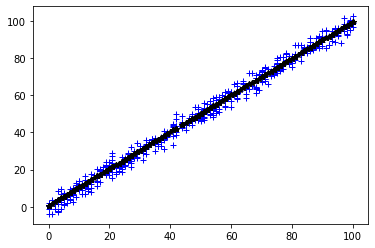

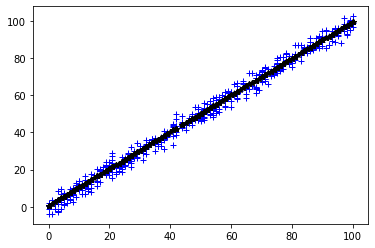

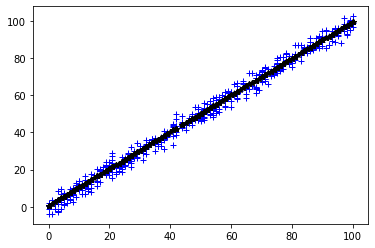

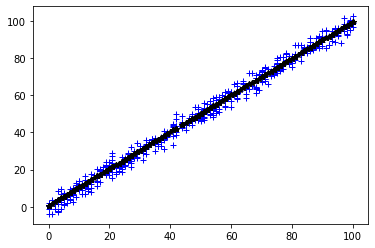

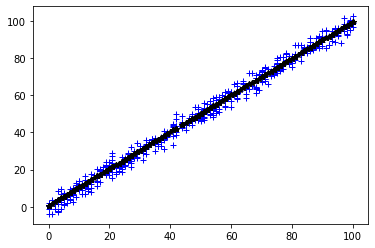

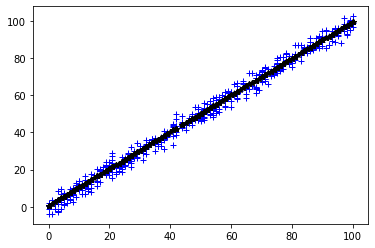

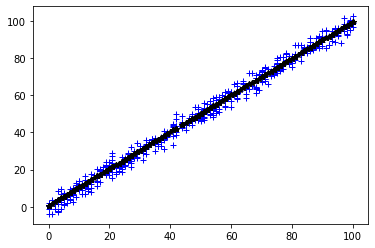

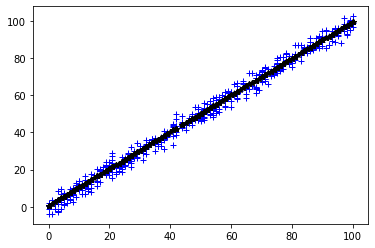

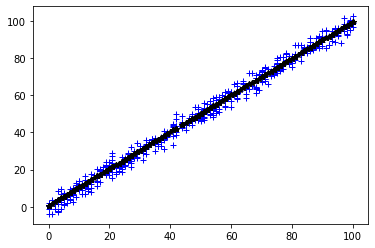

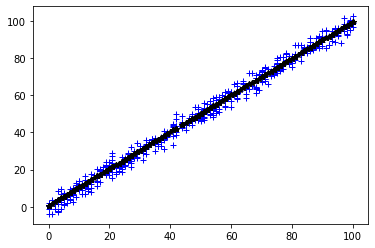

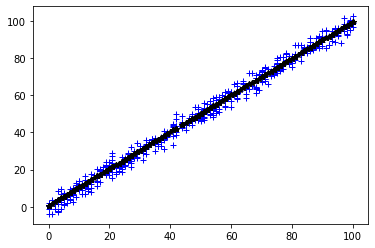

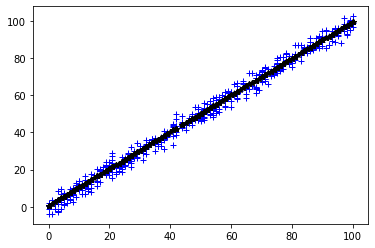

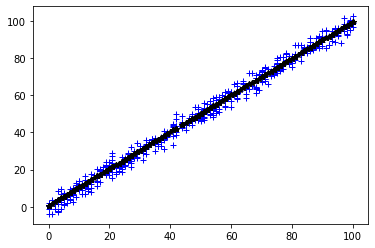

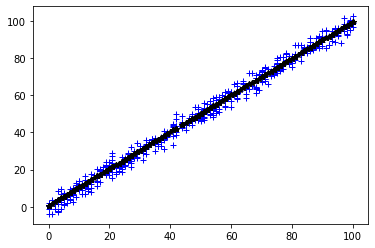

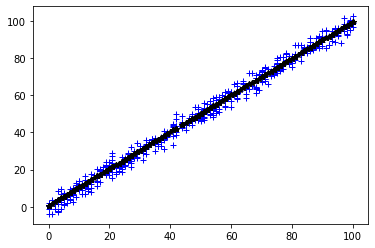

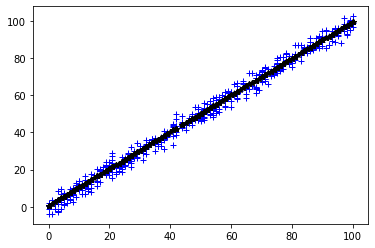

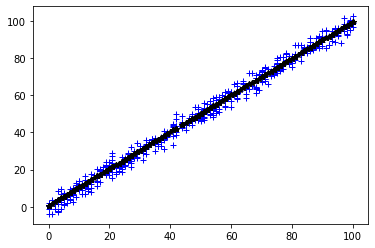

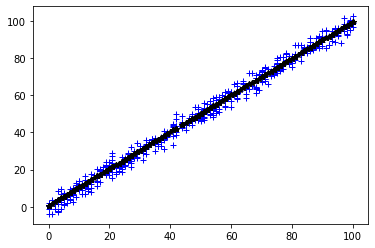

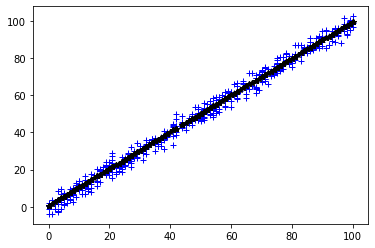

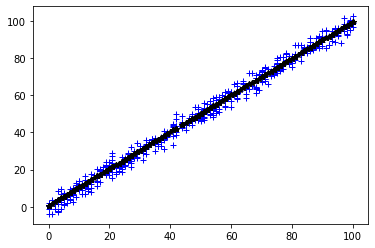

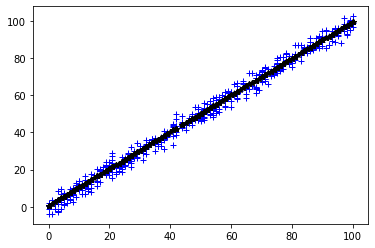

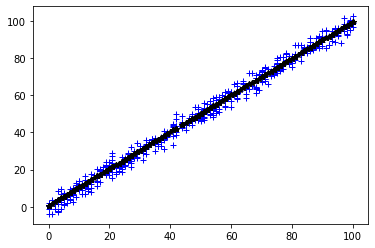

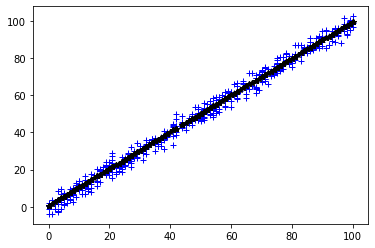

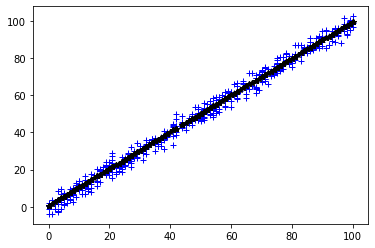

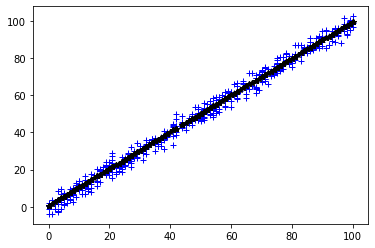

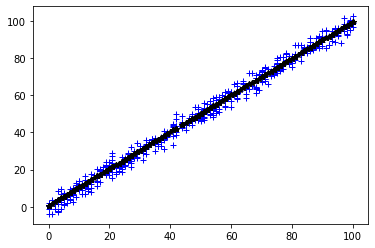

In [50]:

parameters, loss = train(train_input, train_output, 0.0001, 50)

In [51]:
print(parameters)

{'m': 0.9898446486292564, 'c': 0.5006700884668347}


## Let's Predict

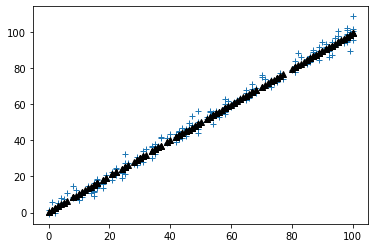

In [57]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '^',c='black')
plt.show()

## Cost for test data

In [53]:
cost_function(test_predictions, test_output)

4.00098960684839

In [54]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

In [55]:
test_predictions

array([[ 5.44989333],
       [60.88119365],
       [47.02336857],
       [97.50544565],
       [30.19600955],
       [62.86088295],
       [ 0.50067009],
       [99.48513495],
       [18.31787376],
       [30.19600955],
       [97.50544565],
       [16.33818447],
       [22.27725236],
       [54.94212576],
       [43.06398998],
       [74.73901874],
       [90.57653311],
       [46.03352393],
       [84.63746522],
       [54.94212576],
       [36.13507744],
       [49.00305787],
       [93.54606706],
       [43.06398998],
       [22.27725236],
       [37.12492209],
       [24.25694166],
       [94.53591171],
       [60.88119365],
       [74.73901874],
       [67.8101062 ],
       [57.91165971],
       [ 5.44989333],
       [52.96243647],
       [79.68824198],
       [82.65777592],
       [25.2467863 ],
       [34.15538814],
       [26.23663095],
       [89.58668847],
       [59.89134901],
       [49.00305787],
       [19.30771841],
       [91.56637776],
       [29.2061649 ],
       [ 8

### <font color = "B"> ~Mubtasim Fuad~ </font>